### Shipping Network
This file includes the code to make the visualizations and get the values for the overall shipping network.

In [13]:
# Imports (Run before running anything else)
import matplotlib.pyplot as plt
import shipping_network as sn
import matplotlib as mpl
import geopandas as gpd
import shapely

#### Parameters
Save the files or not

In [14]:
save = True
present = False
PAGE_WIDTH = 6.5 # 8.5 in page -2*1 in margin

if present:
    plt.style.use('metropolis')
    save_folder = 'presentation'
else:
    plt.style.use('default')
    plt.rcParams.update({
        "font.family": "serif",  # use serif/main font for text elements
        "text.usetex": True,     # use inline math for ticks
        "pgf.rcfonts": False     # don't setup fonts from rc parameters
        })
    save_folder = 'paper'

#### Make the Shipping Network Map
Calls a function to create the shipping network, and makes a map that shows what the network looks like

/Users/gavinengelstad/Documents/Documents - Gavin’s MacBook Pro/School/Spring '24/International Trade/Capstone/final/code/shipping_network.py:66: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")).plot(alpha=0.5, color="gray", ax=ax)


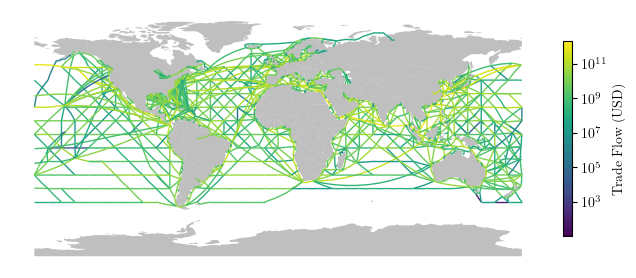

In [15]:
# get file
shipping_network = sn.geodataframe_from_csv('data/Global port supply-chains/Maritime_transport/maritime_network_flows.csv')

# combine two-way edges
nonoverlapping_shipping_network = gpd.GeoDataFrame(
        sn.combine_overlapping_edges(shipping_network, ['from_id', 'to_id'], ['q_sea_flow', 'v_sea_flow'], ['distance', 'geometry'])
    )

# plot attributes
fig, ax = plt.subplots()
fig.set_figwidth(PAGE_WIDTH)
fig.set_figheight(PAGE_WIDTH * 0.4)
ax.axis('off')
# if save: fig.patch.set_visible(False)
sn.add_earth(ax)

# plot
nonoverlapping_shipping_network[shapely.length(nonoverlapping_shipping_network['geometry']) < 359].plot( # condition removes lines that go around accross the pacific
    linewidth=1,
    column='v_sea_flow',
    legend=True,
    legend_kwds={
        'label': 'Trade Flow (USD)',
        'pad': 0.025,
        'shrink': 0.75,
    },
    cmap='viridis',
    ax=ax,
    norm=mpl.colors.LogNorm( # logscale it
        vmin=nonoverlapping_shipping_network['v_sea_flow'].min(),
        vmax=nonoverlapping_shipping_network['v_sea_flow'].max()
    )
)

# final things
fig.tight_layout(pad=0)
if save: fig.savefig(f'../{save_folder}/maps/shipping_network.pdf', bbox_inches='tight', pad_inches=0)